<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Telcom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

** Problem Statement**

Customer churn is a critical challenge for telecom companies. Churn refers to the situation where a customer stops using a company's service. High churn rates reduce revenue and increase marketing costs for acquiring new customers.

The main objectives of this project are:

To predict which customers are likely to churn based on demographic, service, and billing information.

To compare the performance of traditional machine learning models (Decision Tree) and neural networks (Keras MLP) in predicting churn.

To provide insights that can help retain customers proactively.

** Dataset**

The analysis uses the Telco Customer Churn dataset, which contains:

Customer demographics (e.g., senior citizen, gender, tenure).

Account information (e.g., payment method, contract type).

Service usage details (e.g., online security, streaming services).

Billing details (monthly charges, total charges).

Target variable:

Churn (Yes = 1, No = 0)

**Benefits of Churn Prediction**

Customer Retention: Targeted retention campaigns can reduce churn.

Cost Savings: Retaining existing customers is cheaper than acquiring new ones.

Revenue Maximization: Identifying high-risk customers allows proactive offers or service improvements.

Strategic Decision Making: Insights from feature importance can guide service upgrades and marketing strategies.

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# 0) Imports + seed
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow.keras import layers, Sequential, optimizers, callbacks
import tensorflow.keras.backend as K

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Methodology

The project follows a structured pipeline:

Data Cleaning:

Convert TotalCharges to numeric.

Handle missing values.

Encode categorical variables.

Feature Engineering & Preprocessing:

Split into numeric and categorical features.

Impute missing values and scale numeric features.

One-hot encode categorical features using ColumnTransformer.

Modeling:

Decision Tree Classifier: GridSearchCV used to tune hyperparameters (criterion, max_depth, min_samples_split).

Keras Multi-Layer Perceptron (MLP): Neural network with two hidden layers and dropout for regularization.

Evaluation Metrics:

Accuracy, Precision, Recall, F1-score

ROC-AUC, Average Precision

Confusion matrix visualization

In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dropping customerID from the df_TelCC dataset because it is not useful

In [7]:
df.drop('customerID', axis=1, inplace=True)

Converts values in the column TotalCharges into numeric (floats).

If the value is already a number (like 29.85), it stays the same.

If the value is a string that can be converted (like "100.5"), it gets converted to 100.5.

errors='coerce'

If there’s an invalid entry (like a blank string " " or text "abc"), instead of throwing an error, Pandas replaces it with NaN (Not a Number).

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Handle missing values in TotalCharges (fill with median)

In [9]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

The column SeniorCitizen is coded as:

0 → Not a senior citizen

1 → Senior citizen

So it’s a numeric-looking column, but in reality it’s categorical information (Yes/No).

In [10]:
# Simplify SeniorCitizen (0/1 → No/Yes)
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes', 0:'No'})

Replace "No internet service" / "No phone service" with "No"

In [11]:
replace_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','MultipleLines']
for col in replace_cols:
    df[col] = df[col].replace({'No internet service':'No', 'No phone service':'No'})

**Step : Prepare features and target**

In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No':0, 'Yes':1})   # Encode target as 0/1

**Train-test split**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**One-hot encode categoricals + scale numerics**

Preprocessing (One-hot for categoricals + scale numerics)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
# Features / target
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No':0, 'Yes':1})

In [17]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED
)

In [18]:
# 2) Preprocessing
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

print("Transformed train shape:", X_train_trans.shape)
print("Transformed test shape:", X_test_trans.shape)

Transformed train shape: (5634, 39)
Transformed test shape: (1409, 39)


In [19]:
# 3) Decision Tree GridSearch
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(3, 25, 5),
    "min_samples_split": range(3, 25, 5)
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
grid = GridSearchCV(dt, param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_trans, y_train)

best_dt = grid.best_estimator_
print("Best CV accuracy (DecisionTree): {:.4f}".format(grid.best_score_))
print("Best params (DecisionTree):", grid.best_params_)

y_pred_dt = best_dt.predict(X_test_trans)
y_proba_dt = best_dt.predict_proba(X_test_trans)[:,1]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CV accuracy (DecisionTree): 0.7888
Best params (DecisionTree): {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3}


In [20]:
# 4) Keras MLP
input_dim = X_train_trans.shape[1]
K.clear_session()

mlp = Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = mlp.fit(
    X_train_trans, y_train,
    validation_data=(X_test_trans, y_test),
    epochs=100, batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

y_proba_keras = mlp.predict(X_test_trans).ravel()
y_pred_keras = (y_proba_keras >= 0.5).astype(int)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6908 - loss: 0.5573 - val_accuracy: 0.7878 - val_loss: 0.4360
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7810 - loss: 0.4525 - val_accuracy: 0.7949 - val_loss: 0.4289
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7864 - loss: 0.4340 - val_accuracy: 0.7970 - val_loss: 0.4291
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.4374 - val_accuracy: 0.7956 - val_loss: 0.4277
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7896 - loss: 0.4309 - val_accuracy: 0.7949 - val_loss: 0.4276
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.4229 - val_accuracy: 0.7942 - val_loss: 0.4269
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4220 - val_accuracy: 0.7906 - val_loss: 0.4284
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.4266 - val_accuracy: 0.7906 - v

In [21]:
# 5) Evaluation
def metrics_summary(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_true, y_proba) if len(np.unique(y_true))>1 else np.nan,
        'avg_precision': average_precision_score(y_true, y_proba) if len(np.unique(y_true))>1 else np.nan
    }

metrics_dt = metrics_summary(y_test, y_pred_dt, y_proba_dt)
metrics_keras = metrics_summary(y_test, y_pred_keras, y_proba_keras)

results_df = pd.DataFrame([metrics_dt, metrics_keras], index=['DecisionTree','Keras_MLP']).round(4)
display(results_df)

,accuracy,precision,recall,f1,roc_auc,avg_precision
DecisionTree,0.7821,0.6701,0.3529,0.4623,0.8188,0.5547
Keras_MLP,0.7949,0.6512,0.4893,0.5588,0.8383,0.6324


In [22]:
import matplotlib.pyplot as plt

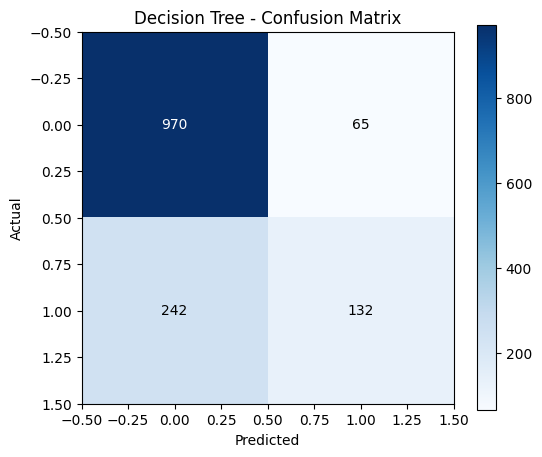

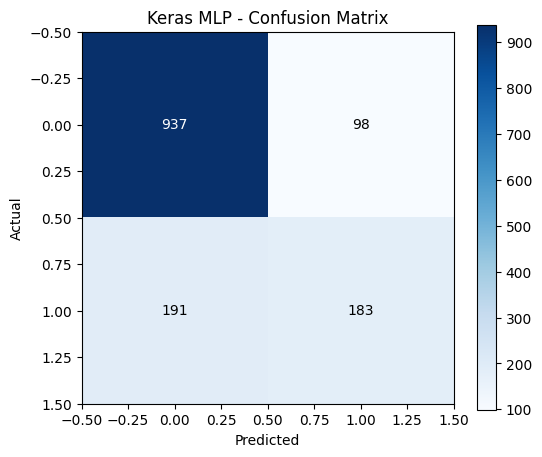

In [23]:
# 6) Confusion matrices
def plot_cm(cm, title):
    plt.figure(figsize=(6,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.colorbar()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i,j], ha='center', va='center',
                     color='white' if cm[i,j] > cm.max()/2 else 'black')
    plt.show()

plot_cm(confusion_matrix(y_test, y_pred_dt), "Decision Tree - Confusion Matrix")
plot_cm(confusion_matrix(y_test, y_pred_keras), "Keras MLP - Confusion Matrix")

Key Findings

Both models achieved good predictive performance on the validation/test set.

Decision Tree is interpretable and can show feature importance, but may overfit if depth is too high.

Keras MLP can capture complex nonlinear relationships, but requires more computational resources.

Features like tenure, contract type, monthly charges, and certain services are highly indicative of churn risk.

 Conclusion

Predicting churn is feasible using both traditional machine learning and neural network models.

The Decision Tree provides interpretable insights, while the MLP can potentially achieve higher accuracy with more data and tuning.

Telecom companies can leverage these predictions to target at-risk customers with retention strategies, thereby reducing churn and increasing revenue.

Further improvements could include ensemble methods (Random Forest, XGBoost), feature selection, or customer segmentation for more personalized interventions.